In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_set = pd.read_csv('/share/ju/nexar_data/train_test_splits/flooding_train_test_split/flooding_train_test_split_train.csv')

In [3]:
# drop all Unnamed columns
train_set = train_set.loc[:, ~train_set.columns.str.contains('^Unnamed')]

In [10]:
clip_results = pd.read_csv("/share/ju/urbanECG/output/open_clip/flooding/clip_vitg_flooding_results.csv")

In [39]:
clip_results = pd.merge(train_set, clip_results, left_on="frame_id", right_on="img_id", how='inner')

In [41]:
# sort clip results on flooded road, descending
clip_results = clip_results.sort_values(by=['flooded_road'], ascending=False).reset_index(drop=True)

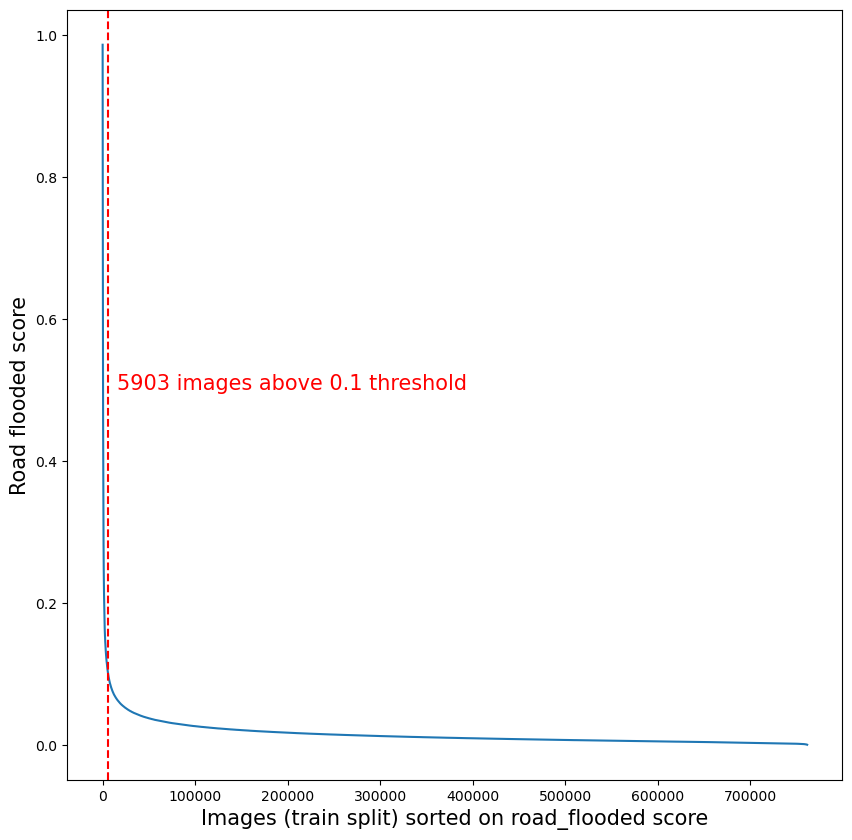

In [47]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(clip_results['flooded_road'])
# labels 
ax.set_xlabel('Images (train split) sorted on road_flooded score', fontsize=15)
ax.set_ylabel('Road flooded score', fontsize=15)

# add vertical line at last image with flooded road >= 0.1 
ax.axvline(x=clip_results[clip_results['flooded_road'] >= 0.1].index[-1], color='r', linestyle='--')
# label vertical line with number of images with flooded road >= 0.1
ax.text(clip_results[clip_results['flooded_road'] >= 0.1].index[-1] + 10000, 0.5, str(len(clip_results[clip_results['flooded_road'] >= 0.1])) + " images above 0.1 threshold", fontsize=15, color='r')

# save 
plt.savefig('/share/ju/urbanECG/output/street_flooding/clip_vitg_flooding_results.png')

In [4]:
clip_gpt_results = pd.read_csv("/share/ju/urbanECG/drivers/cv/oai/flooding_gpt4v.csv")

In [5]:
train_set

,frame_id,frame_url,camera_heading,captured_at,timezone_offset,h3_index_res12,thumbnail_url,direction,frame_quality,frame_context,...,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,PUMA,Shape_Leng,Shape_Area
0,69fadc9f8ba1fca3f8ef8e0ac068cf45,https://external-api.getnexar.com/aod/full/fra...,280.887575,2023-09-29 08:18:28.491000-04:00,-14400,631243919201063935,https://external-api.getnexar.com/aod/thumbnai...,WEST,0.865966,DAYLIGHT,...,2050400.0,NaN,Pelham Bay Park,BX2891,BX28,BX28 Pelham Bay Park (JIA 28 Approximation),3.600505e+10,4210.0,87370.078995,7.930360e+07
1,64131d7b3fdd56d6465b3b15f4f476a0,https://external-api.getnexar.com/aod/full/fra...,103.312496,2023-09-29 08:10:02.704000-04:00,-14400,631243919201063935,https://external-api.getnexar.com/aod/thumbnai...,EAST,0.869586,DAYLIGHT,...,2050400.0,NaN,Pelham Bay Park,BX2891,BX28,BX28 Pelham Bay Park (JIA 28 Approximation),3.600505e+10,4210.0,87370.078995,7.930360e+07
2,afed5ce64c907520c2f12c3a9011f917,https://external-api.getnexar.com/aod/full/fra...,168.502823,2023-09-29 14:43:15.177000-04:00,-14400,631243919195777023,https://external-api.getnexar.com/aod/thumbnai...,SOUTH,0.725365,DAYLIGHT,...,2030201.0,NaN,Co-op City,BX1004,BX10,BX10 Co-op City-Throgs Neck (CD 10 Approximation),3.600503e+10,4210.0,6891.715666,2.389721e+06
3,b2d59019fa71d6f347d6f55e044cea8c,https://external-api.getnexar.com/aod/full/fra...,248.275245,2023-09-29 14:43:06.355000-04:00,-14400,631243919195777535,https://external-api.getnexar.com/aod/thumbnai...,WEST,0.639790,DAYLIGHT,...,2030201.0,NaN,Co-op City,BX1004,BX10,BX10 Co-op City-Throgs Neck (CD 10 Approximation),3.600503e+10,4210.0,6891.715666,2.389721e+06
4,40f12ae718ead40bfbf42446c1747cb4,https://external-api.getnexar.com/aod/full/fra...,159.382138,2023-09-29 14:42:56.553000-04:00,-14400,631243919195794943,https://external-api.getnexar.com/aod/thumbnai...,SOUTH,0.671262,DAYLIGHT,...,2030201.0,NaN,Co-op City,BX1004,BX10,BX10 Co-op City-Throgs Neck (CD 10 Approximation),3.600503e+10,4210.0,6891.715666,2.389721e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761522,92cf5fb22ab75ea4cba88135fd324a75,https://external-api.getnexar.com/aod/full/fra...,312.250000,2023-09-29 11:44:10.393000-04:00,-14400,631243950367321599,https://external-api.getnexar.com/aod/thumbnai...,NORTH_WEST,0.663133,DAYLIGHT,...,3044600.0,NaN,Mapleton-Midwood (West),BK1204,BK12,BK12 Borough Park-Kensington (CD 12 Approximat...,3.604704e+10,4312.0,6422.346053,1.523483e+06
761523,1d93c6b8aaa6eedb2191176240c45d1c,https://external-api.getnexar.com/aod/full/fra...,316.250000,2023-09-29 11:42:17.393000-04:00,-14400,631243950367314943,https://external-api.getnexar.com/aod/thumbnai...,NORTH_WEST,0.638616,DAYLIGHT,...,3044600.0,NaN,Mapleton-Midwood (West),BK1204,BK12,BK12 Borough Park-Kensington (CD 12 Approximat...,3.604704e+10,4312.0,6422.346053,1.523483e+06
761524,a4b9bf68e9b6a03d3a4c8d6e0b9a4e29,https://external-api.getnexar.com/aod/full/fra...,128.338867,2023-09-29 10:12:06.888000-04:00,-14400,631243950367314431,https://external-api.getnexar.com/aod/thumbnai...,SOUTH_EAST,1.000000,DAYLIGHT,...,3044600.0,NaN,Mapleton-Midwood (West),BK1204,BK12,BK12 Borough Park-Kensington (CD 12 Approximat...,3.604704e+10,4312.0,6422.346053,1.523483e+06
761525,b65d462d8082e18738482ba36900c59f,https://external-api.getnexar.com/aod/full/fra...,128.338867,2023-09-29 10:12:01.888000-04:00,-14400,631243950367311871,https://external-api.getnexar.com/aod/thumbnai...,SOUTH_EAST,0.904577,DAYLIGHT,...,3044600.0,NaN,Mapleton-Midwood (West),BK1204,BK12,BK12 Borough Park-Kensington (CD 12 Approximat...,3.604704e+10,4312.0,6422.346053,1.523483e+06


In [6]:
clip_gpt_results

,img_path,gpt_classification,id,Unnamed: 0,frame_id,frame_url,camera_heading,captured_at,timezone_offset,h3_index_res12,...,flooded_road,wet_road,dry_road,no_road,flooded_road_percentile,wet_road_percentile,dry_road_percentile,no_road_percentile,not_flooded,not_flooded_percentile
0,/share/ju/nexar_data/2023/2023-09-29/604222323...,wet road,aa8a851003c9f4128e21f3f3c34c26a9,285420,aa8a851003c9f4128e21f3f3c34c26a9,https://external-api.getnexar.com/aod/full/fra...,196.875000,2023-09-29 08:56:38.389000-04:00,-14400,631243921509090815,...,0.107604,0.886992,0.000130,0.005274,0.993286,0.259650,0.454184,0.414222,0.892396,0.006716
1,/share/ju/nexar_data/2023/2023-09-29/604222324...,wet road,3c523e6eaf79d43d4c802e05633f17db,140872,3c523e6eaf79d43d4c802e05633f17db,https://external-api.getnexar.com/aod/full/fra...,24.824139,2023-09-29 16:01:36.494000-04:00,-14400,631243921865397247,...,0.103506,0.456691,0.017433,0.422370,0.992731,0.096548,0.968464,0.882288,0.896494,0.007270
2,/share/ju/nexar_data/2023/2023-09-29/604222352...,flooded road,d7dad2b79fb5a535286a3337190b863c,743478,d7dad2b79fb5a535286a3337190b863c,https://external-api.getnexar.com/aod/full/fra...,84.000000,2023-09-29 10:07:33.958000-04:00,-14400,631243950347279359,...,0.119135,0.880296,0.000008,0.000560,0.994535,0.253270,0.057627,0.091595,0.880865,0.005466
3,/share/ju/nexar_data/2023/2023-09-29/604222325...,wet road,cc9cfde699cd30325c26cb050bba44c2,66966,cc9cfde699cd30325c26cb050bba44c2,https://external-api.getnexar.com/aod/full/fra...,146.632690,2023-09-29 09:03:20.594000-04:00,-14400,631243922951767039,...,0.122143,0.874752,0.000048,0.003058,0.994753,0.248280,0.292820,0.327552,0.877857,0.005248
4,/share/ju/nexar_data/2023/2023-09-29/604222323...,wet road,f32a3238bcd4dca99d83e15ff96c7e8a,197232,f32a3238bcd4dca99d83e15ff96c7e8a,https://external-api.getnexar.com/aod/full/fra...,71.625000,2023-09-29 13:56:16.521000-04:00,-14400,631243920734494207,...,0.145482,0.850378,0.000077,0.004063,0.996277,0.229451,0.371277,0.373318,0.854518,0.003724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5898,/share/ju/nexar_data/2023/2023-09-29/604222325...,wet road,8740c4adc877a1a9fad4e7614f2cc785,220780,8740c4adc877a1a9fad4e7614f2cc785,https://external-api.getnexar.com/aod/full/fra...,249.588623,2023-09-29 08:02:31.698000-04:00,-14400,631243923057197567,...,0.300486,0.698652,0.000018,0.000844,0.998830,0.160016,0.138992,0.136457,0.699513,0.001171
5899,/share/ju/nexar_data/2023/2023-09-29/604222323...,wet road,c32919880dd3d2eee6f3eb77c52f5d0a,190138,c32919880dd3d2eee6f3eb77c52f5d0a,https://external-api.getnexar.com/aod/full/fra...,27.515625,2023-09-29 11:50:14.358000-04:00,-14400,631243920687941631,...,0.127413,0.870713,0.000027,0.001846,0.995203,0.244862,0.201386,0.246534,0.872587,0.004798
5900,/share/ju/nexar_data/2023/2023-09-29/604222337...,wet road,b12456df5702407a30039f818577f435,260565,b12456df5702407a30039f818577f435,https://external-api.getnexar.com/aod/full/fra...,272.250000,2023-09-29 11:33:54.195000-04:00,-14400,631243935098963455,...,0.132948,0.866927,0.000003,0.000123,0.995601,0.241761,0.008404,0.011062,0.867052,0.004400
5901,/share/ju/nexar_data/2023/2023-09-29/604222324...,flooded road,4f4b3b45fa5752644d4e10a8674f05f1,507020,4f4b3b45fa5752644d4e10a8674f05f1,https://external-api.getnexar.com/aod/full/fra...,69.500000,2023-09-29 13:56:35.895000-04:00,-14400,631243922600238079,...,0.262764,0.736939,0.000004,0.000294,0.998603,0.173508,0.020995,0.042360,0.737236,0.001398


In [7]:
# drop Unnamed columns
clip_gpt_results = clip_gpt_results.loc[:, ~clip_gpt_results.columns.str.contains('^Unnamed')]

In [8]:
merged = pd.merge(train_set, clip_gpt_results, left_on="frame_id", right_on="img_id", how='inner')

In [9]:
len(merged)

5903

In [123]:
assert len(merged) == len(train_set)

AssertionError: 

In [124]:
merged.columns

Index(['frame_id_x', 'frame_url_x', 'camera_heading_x', 'captured_at_x',
       'timezone_offset_x', 'h3_index_res12_x', 'thumbnail_url_x',
       'direction_x', 'frame_quality_x', 'frame_context_x',
       'gps_info.longitude_x', 'gps_info.latitude_x',
       'osm_info.osm_node_id_from_x', 'osm_info.osm_node_id_to_x',
       'osm_info.road_type_x', 'h3_12_x', 'h3_index_res06_x', 'geometry_x',
       'index_right_x', 'CTLabel_x', 'BoroCode_x', 'BoroName_x', 'CT2020_x',
       'BoroCT2020_x', 'CDEligibil_x', 'NTAName_x', 'NTA2020_x', 'CDTA2020_x',
       'CDTANAME_x', 'GEOID_x', 'PUMA_x', 'Shape_Leng_x', 'Shape_Area_x',
       'img_path', 'gpt_classification', 'id', 'frame_id_y', 'frame_url_y',
       'camera_heading_y', 'captured_at_y', 'timezone_offset_y',
       'h3_index_res12_y', 'thumbnail_url_y', 'direction_y', 'frame_quality_y',
       'frame_context_y', 'gps_info.longitude_y', 'gps_info.latitude_y',
       'osm_info.osm_node_id_from_y', 'osm_info.osm_node_id_to_y',
       'osm_

In [125]:
# drop all _y columns
merged = merged.loc[:, ~merged.columns.str.contains('_y')]

In [126]:
# remove _x suffix from all columns
merged.columns = merged.columns.str.replace('_x', '')

In [127]:
# drop geometry column
merged = merged.drop(columns=['geometry'])

# drop CDEligibil column
merged = merged.drop(columns=['CDEligibil'])

# drop "index_right": NaN, "CTLabel": NaN, "BoroCode": NaN, "BoroName": NaN, "CT2020": NaN, "BoroCT2020": NaN, "NTAName": NaN, "NTA2020": NaN, "CDTA2020": NaN, "CDTANAME": NaN, "GEOID": NaN, "PUMA": NaN, "Shape_Leng": NaN, "Shape_Area": 
merged = merged.drop(columns=['index_right', 'CTLabel', 'BoroCode', 'BoroName', 'CT2020', 'BoroCT2020', 'NTAName', 'NTA2020', 'CDTA2020', 'CDTANAME', 'GEOID', 'PUMA', 'Shape_Leng', 'Shape_Area'])

# drop h3_12
merged = merged.drop(columns=['h3_12'])

In [128]:
merged.isna().sum()

frame_id                     0
frame_url                    0
camera_heading               0
captured_at                  0
timezone_offset              0
h3_index_res12               0
thumbnail_url                0
direction                    0
frame_quality                0
frame_context                0
gps_info.longitude           0
gps_info.latitude            0
osm_info.osm_node_id_from    0
osm_info.osm_node_id_to      0
osm_info.road_type           0
h3_index_res06               0
img_path                     0
gpt_classification           0
id                           0
img_id                       0
flooded_road                 0
wet_road                     0
dry_road                     0
no_road                      0
flooded_road_percentile      0
wet_road_percentile          0
dry_road_percentile          0
no_road_percentile           0
not_flooded                  0
not_flooded_percentile       0
dtype: int64

In [129]:
merged.gpt_classification.value_counts()

gpt_classification
 wet road         5202
 flooded road      688
 dry road           10
 no road shown       2
 Wet road            1
Name: count, dtype: int64

In [130]:
# make all gpt_classification values lowercase
merged['gpt_classification'] = merged['gpt_classification'].str.lower()

In [131]:
# replace all nas with "" or 0  
merged = merged.fillna("")


In [132]:
merged.to_csv("/share/ju/urbanECG/output/street_flooding/train_set_w_clip_gt_pt1_gpt.csv", index=False)

In [133]:
merged.flooded_road.describe()

count    5903.000000
mean        0.209263
std         0.166995
min         0.100010
25%         0.115867
50%         0.142122
75%         0.215764
max         0.986629
Name: flooded_road, dtype: float64

In [134]:
merged.gpt_classification = merged.gpt_classification.astype(str)

In [135]:
merged.gpt_classification.value_counts()

gpt_classification
 wet road         5203
 flooded road      688
 dry road           10
 no road shown       2
Name: count, dtype: int64

In [136]:
# encode gpt_classification
merged['gpt_classification'] = merged['gpt_classification'].astype('category')

In [137]:
merged.gpt_classification

0            wet road
1            wet road
2            wet road
3            wet road
4            wet road
            ...      
5898         wet road
5899     flooded road
5900         wet road
5901         wet road
5902         wet road
Name: gpt_classification, Length: 5903, dtype: category
Categories (4, object): [' dry road', ' flooded road', ' no road shown', ' wet road']

In [140]:
# print category codes
merged.gpt_classification.cat.codes

0       3
1       3
2       3
3       3
4       3
       ..
5898    3
5899    1
5900    3
5901    3
5902    3
Length: 5903, dtype: int8

In [155]:
# strip all leading and trailing whitespace from gpt_classification
merged['gpt_classification'] = merged['gpt_classification'].str.strip()

In [163]:
merged[merged.gpt_classification == 'flooded road'].reset_index(drop=True).to_csv('/share/ju/urbanECG/output/street_flooding/train_set_w_clip_gt_pt1_gpt_flooded_road.csv', index=False)

In [13]:
# number of rows with flooded_road > 0.2
print(len(merged[merged['flooded_road'] > 0.1]))
merged[merged['flooded_road'] > 0.1].to_csv("/share/ju/urbanECG/output/street_flooding/train_set_gt_pt2_w_clipvitg_results_flooded_road.csv")


5903


In [28]:
merged[merged['flooded_road'] > 0.1]['img_path'].head().to_list()

['/share/ju/nexar_data/2023/2023-09-29/604222321527357439/frames/64131d7b3fdd56d6465b3b15f4f476a0.jpg',
 '/share/ju/nexar_data/2023/2023-09-29/604222321527357439/frames/844bc9e17d45bbbae26708f4c5c41a98.jpg',
 '/share/ju/nexar_data/2023/2023-09-29/604222321527357439/frames/d81e9a9841742c735870f37540ba3004.jpg',
 '/share/ju/nexar_data/2023/2023-09-29/604222321527357439/frames/0f3ed34417bb707b90d15f7158539ba1.jpg',
 '/share/ju/nexar_data/2023/2023-09-29/604222321527357439/frames/de2b091c3bf4429cb4ca101d46801f04.jpg']